
# GrÃ¡ficos univariados com **Seaborn** â€” Exemplo: *Titanic*

GrÃ¡ficos **com uma variÃ¡vel** (numÃ©rica **ou** categÃ³rica), usando o dataset `titanic` do Seaborn.


## 1. PreparaÃ§Ã£o do ambiente

In [1]:

# !pip install seaborn pandas matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



## 2. Dados: `titanic` (Seaborn)

- Cada linha Ã© um passageiro(a) do Titanic.
- Vamos escolher:
  - **VariÃ¡vel numÃ©rica**: `age`
  - **VariÃ¡vel categÃ³rica**: `class` (Primeira/Segunda/Terceira)


In [2]:
df = sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True


## 3. **Quando usar** cada grÃ¡fico (resumo mÃ­nimo)

- **Histograma**: distribuiÃ§Ã£o de uma variÃ¡vel **numÃ©rica**; bom para ver **moda(s)** e **assimetria**.
- **Densidade (KDE)**: versÃ£o **suavizada** da distribuiÃ§Ã£o; bom para uma **curva limpa** (com ou sem preenchimento).
- **ECDF**: ver **percentis** e proporÃ§Ãµes **acumuladas** (ex.: "qual % tem idade â‰¤ 30?").
- **Boxplot**: **resumo robusto** (mediana e quartis); bom para detectar **outliers** rapidamente.
- **Violino**: como o boxplot, mas mostra a **forma** da distribuiÃ§Ã£o (mistura de KDE + resumo).
- **Barras (contagem)**: para **categÃ³ricas**, mostra **frequÃªncias** absolutas.
- **Barras (proporÃ§Ã£o)**: para **categÃ³ricas**, quando interessa a **percentagem** de cada categoria.



## 4. VariÃ¡vel **numÃ©rica** â€” Histograma (`age`)

**Quando usar:** distribuiÃ§Ã£o simples de valores numÃ©ricos; ver concentraÃ§Ã£o, caudas e assimetria.


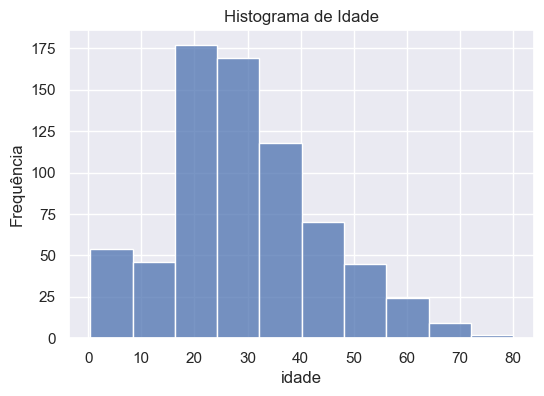

In [3]:
#sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="age", bins=10)
plt.title("Histograma de Idade") # nomear o grafico
plt.xlabel("idade") # nomemar o eixo x
plt.ylabel("FrequÃªncia") # nomear o eixo y
plt.show()


### 4.1. Densidade (KDE)

**Quando usar:** destacar a **forma** geral da distribuiÃ§Ã£o sem as barras do histograma.


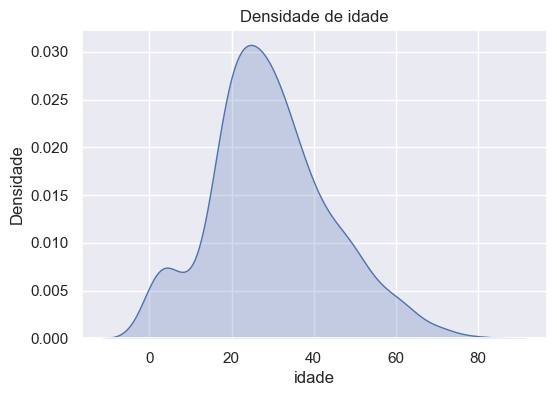

In [4]:

plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="age", fill=True)
plt.title("Densidade de idade")
plt.xlabel("idade")
plt.ylabel("Densidade")
plt.show()



### 4.2. ECDF (funÃ§Ã£o de distribuiÃ§Ã£o acumulada empÃ­rica)

**Quando usar:** responder perguntas como "qual proporÃ§Ã£o tem **idade â‰¤ x**?"


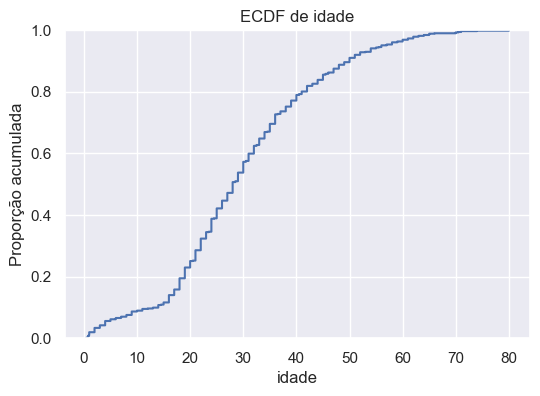

In [5]:

plt.figure(figsize=(6,4))
sns.ecdfplot(data=df, x="age")
plt.title("ECDF de idade")
plt.xlabel("idade")
plt.ylabel("ProporÃ§Ã£o acumulada")
plt.show()



### 4.3. Boxplot e Violino

**Quando usar:**
- **Boxplot**: resumo compacto (mediana, quartis, outliers).
- **Violino**: quando quiser tambÃ©m a **densidade** (forma) da distribuiÃ§Ã£o.


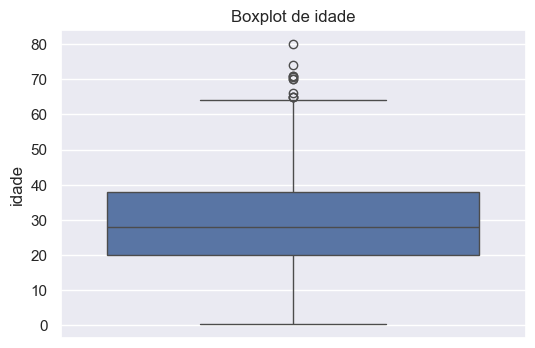

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y="age")
plt.title("Boxplot de idade")
plt.ylabel("idade")
plt.show()


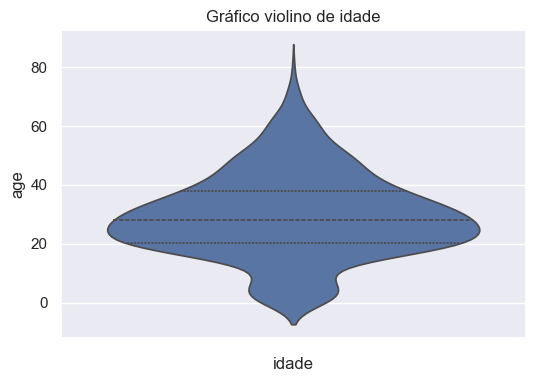

In [7]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, y="age", inner='quartile')
plt.title(f"GrÃ¡fico violino de idade")
plt.xlabel("idade")
plt.show()



## 5. VariÃ¡vel **categÃ³rica** â€” Barras de contagem (`class`)

**Quando usar:** para **frequÃªncias absolutas** por categoria.


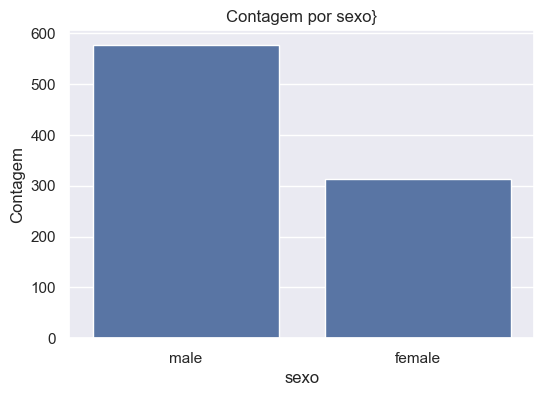

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sex")
plt.title("Contagem por sexo}")
plt.xlabel("sexo")
plt.ylabel("Contagem")
plt.show()


### 5.1. Barras com **proporÃ§Ã£o**

**Quando usar:** comparar **percentuais** e nÃ£o apenas contagens.


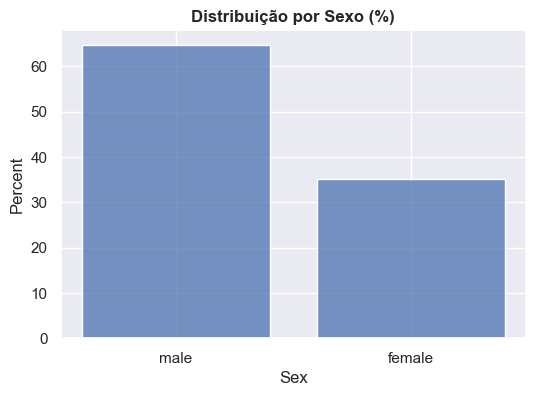

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Sex', stat='percent', shrink=0.8)
plt.title('DistribuiÃ§Ã£o por Sexo (%)', fontweight='bold')
plt.show()

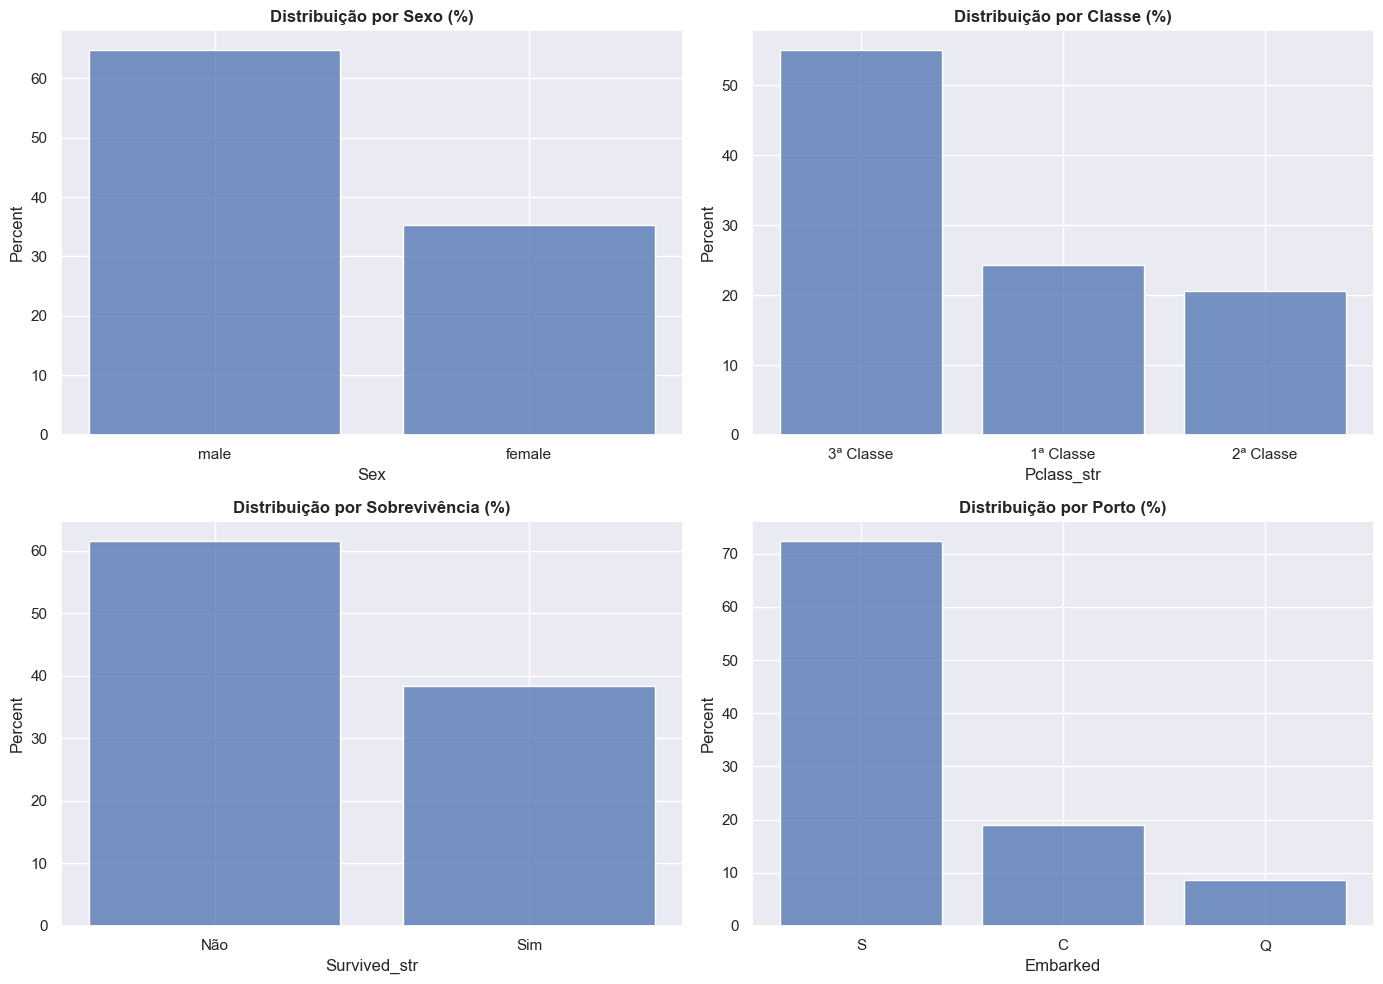

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sexo
sns.histplot(data=df, x='Sex', stat='percent', ax=axes[0, 0], shrink=0.8)
axes[0, 0].set_title('DistribuiÃ§Ã£o por Sexo (%)', fontweight='bold')

# Classe - converter para string
df['Pclass_str'] = df['Pclass'].astype(str) + 'Âª Classe'
sns.histplot(data=df, x='Pclass_str', stat='percent', 
             ax=axes[0, 1], shrink=0.8)
axes[0, 1].set_title('DistribuiÃ§Ã£o por Classe (%)', fontweight='bold')

# SobrevivÃªncia - converter para string
df['Survived_str'] = df['Survived'].map({0: 'NÃ£o', 1: 'Sim'})
sns.histplot(data=df, x='Survived_str', stat='percent',
             ax=axes[1, 0], shrink=0.8)
axes[1, 0].set_title('DistribuiÃ§Ã£o por SobrevivÃªncia (%)', fontweight='bold')

# Porto de embarque
sns.histplot(data=df[df['Embarked'].notna()], x='Embarked', 
             stat='percent', ax=axes[1, 1], shrink=0.8)
axes[1, 1].set_title('DistribuiÃ§Ã£o por Porto (%)', fontweight='bold')

plt.tight_layout()
plt.savefig('proporcoes_simples.png', dpi=300, bbox_inches='tight')
plt.show()

### Outro caminho, alterando o banco de dados

#### Renomear as categorias, usando map

In [29]:
# Renomear Survived: 0/1 â†’ NÃ£o/Sim
df['Sobreviveu'] = df['Survived'].map({
    0: 'NÃ£o',
    1: 'Sim'
})

# Renomear Sex: male/female â†’ Masculino/Feminino
df['Sexo'] = df['Sex'].map({
    'male': 'Masculino',
    'female': 'Feminino'
})

# Renomear Pclass: 1/2/3 â†’ 1Âª/2Âª/3Âª Classe
df['Classe'] = df['Pclass'].map({
    1: '1Âª Classe',
    2: '2Âª Classe',
    3: '3Âª Classe'
})

# Renomear Embarked
df['Porto'] = df['Embarked'].map({
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
})

print("âœ“ VariÃ¡veis categÃ³ricas renomeadas!")
print("\nVisualizar as novas colunas:")
print(df[['Sobreviveu', 'Sexo', 'Classe', 'Porto']].head())

âœ“ VariÃ¡veis categÃ³ricas renomeadas!

Visualizar as novas colunas:
  Sobreviveu       Sexo     Classe        Porto
0        NÃ£o  Masculino  3Âª Classe  Southampton
1        Sim   Feminino  1Âª Classe    Cherbourg
2        Sim   Feminino  3Âª Classe  Southampton
3        Sim   Feminino  1Âª Classe  Southampton
4        NÃ£o  Masculino  3Âª Classe  Southampton


#### Criando os grÃ¡ficos

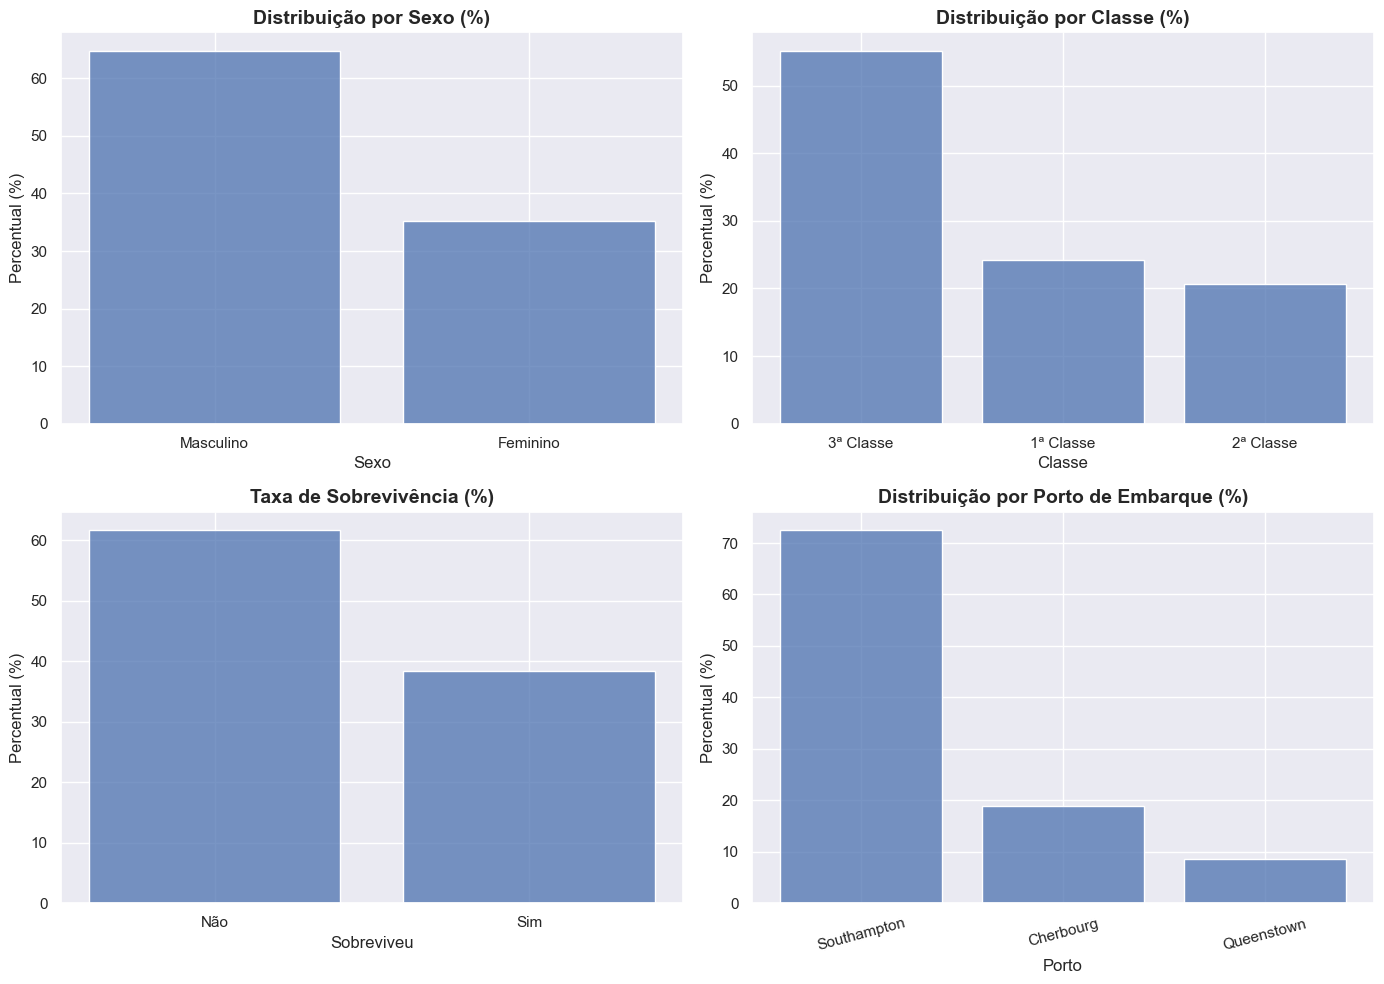

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sexo - SIMPLES E LIMPO!
sns.histplot(data=df, x='Sexo', stat='percent', ax=axes[0, 0], shrink=0.8)
axes[0, 0].set_title('DistribuiÃ§Ã£o por Sexo (%)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Percentual (%)', fontsize=12)

# Classe - SIMPLES E LIMPO!
sns.histplot(data=df, x='Classe', stat='percent', ax=axes[0, 1], shrink=0.8)
axes[0, 1].set_title('DistribuiÃ§Ã£o por Classe (%)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Percentual (%)', fontsize=12)

# SobrevivÃªncia - SIMPLES E LIMPO!
sns.histplot(data=df, x='Sobreviveu', stat='percent', ax=axes[1, 0], shrink=0.8)
axes[1, 0].set_title('Taxa de SobrevivÃªncia (%)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Percentual (%)', fontsize=12)

# Porto - SIMPLES E LIMPO!
sns.histplot(data=df[df['Porto'].notna()], x='Porto', 
             stat='percent', ax=axes[1, 1], shrink=0.8)
axes[1, 1].set_title('DistribuiÃ§Ã£o por Porto de Embarque (%)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Percentual (%)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('proporcoes_simples.png', dpi=300, bbox_inches='tight')
plt.show()

### Fazendo tabelas 

In [32]:
print("\nðŸ“Š DistribuiÃ§Ã£o por Sexo:")
tab_sexo = (df['Sexo']
            .value_counts(normalize=True)
            .rename('ProporÃ§Ã£o')
            .reset_index()
            .rename(columns={'Sexo': 'Categoria'}))
print(tab_sexo)

print("\nðŸ“Š DistribuiÃ§Ã£o por Classe:")
tab_classe = (df['Classe']
              .value_counts(normalize=True)
              .rename('ProporÃ§Ã£o')
              .reset_index()
              .rename(columns={'Classe': 'Categoria'}))
print(tab_classe)

print("\nðŸ“Š Taxa de SobrevivÃªncia:")
tab_sobreviveu = (df['Sobreviveu']
                  .value_counts(normalize=True)
                  .rename('ProporÃ§Ã£o')
                  .reset_index()
                  .rename(columns={'Sobreviveu': 'Categoria'}))
print(tab_sobreviveu)

print("\nðŸ“Š DistribuiÃ§Ã£o por Porto:")
tab_porto = (df['Porto']
             .value_counts(normalize=True)
             .rename('ProporÃ§Ã£o')
             .reset_index()
             .rename(columns={'Porto': 'Categoria'}))
print(tab_porto)


ðŸ“Š DistribuiÃ§Ã£o por Sexo:
   Categoria  ProporÃ§Ã£o
0  Masculino   0.647587
1   Feminino   0.352413

ðŸ“Š DistribuiÃ§Ã£o por Classe:
   Categoria  ProporÃ§Ã£o
0  3Âª Classe   0.551066
1  1Âª Classe   0.242424
2  2Âª Classe   0.206510

ðŸ“Š Taxa de SobrevivÃªncia:
  Categoria  ProporÃ§Ã£o
0       NÃ£o   0.616162
1       Sim   0.383838

ðŸ“Š DistribuiÃ§Ã£o por Porto:
     Categoria  ProporÃ§Ã£o
0  Southampton   0.724409
1    Cherbourg   0.188976
2   Queenstown   0.086614
